In [1]:
import pandas as pd
import numpy as np

from functions.datacleaning import MoscowHousing as mh
from functions.distance import get_distance_coordinates, norm_features, PCA_plot
from functions.clean import DataClean as dc

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#df1 = pd.read_csv("../data/apartments_train.csv")
#df2 = pd.read_csv("../data/buildings_train.csv")
#df3 = pd.read_csv("../data/apartments_test.csv")
#df4 = pd.read_csv("../data/buildings_test.csv")

In [3]:
#train_corr = pd.read_csv("../data/apartments_and_building_train.csv")
#test_corr  = pd.read_csv("../data/apartments_and_building_test.csv")

In [4]:
data = dc()

In [5]:
X_train, y_train = data.get_data_train()

In [6]:
X_test = data.get_data_test()

# Output Data Cateory 1

In [7]:
# Write data to files
X_train.to_csv("train_prepared_category_1.csv")
X_test.to_csv("test_prepared_category_1.csv")

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23285 entries, 0 to 20507
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 23285 non-null  int64  
 1   price              23285 non-null  float64
 2   area_total         23285 non-null  float64
 3   area_kitchen       18564 non-null  float64
 4   area_living        19403 non-null  float64
 5   floor              23285 non-null  float64
 6   rooms              23285 non-null  float64
 7   ceiling            23285 non-null  float64
 8   bathrooms_shared   19413 non-null  float64
 9   bathrooms_private  19413 non-null  float64
 10  windows_court      15213 non-null  float64
 11  windows_street     15213 non-null  float64
 12  balconies          12765 non-null  float64
 13  loggias            12765 non-null  float64
 14  phones             23205 non-null  float64
 15  building_id        23285 non-null  int64  
 16  latitude           232

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9937 entries, 0 to 9936
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9937 non-null   int64  
 1   area_total         9937 non-null   float64
 2   area_kitchen       7704 non-null   float64
 3   area_living        7918 non-null   float64
 4   floor              9937 non-null   float64
 5   rooms              9937 non-null   float64
 6   ceiling            9937 non-null   float64
 7   bathrooms_shared   8220 non-null   float64
 8   bathrooms_private  8220 non-null   float64
 9   windows_court      6449 non-null   float64
 10  windows_street     6449 non-null   float64
 11  balconies          5102 non-null   float64
 12  loggias            5102 non-null   float64
 13  phones             9897 non-null   float64
 14  building_id        9937 non-null   int64  
 15  latitude           9937 non-null   float64
 16  longitude          9937 

# Data Explorations

In [10]:
X_test.head()

,id,area_total,area_kitchen,area_living,floor,rooms,ceiling,bathrooms_shared,bathrooms_private,windows_court,...,garbage_chute_0.0,garbage_chute_1.0,garbage_chute_nan,heating_0.0,heating_1.0,heating_2.0,heating_3.0,heating_nan,elevator,elevator_no
0,23285,-0.066435,NaN,NaN,2.0,1.0,0.000000,NaN,NaN,1.0,...,0,1,0,1,0,0,0,0,True,False
12,23286,-0.375168,-1.290326,0.316772,4.0,1.0,-0.045610,NaN,NaN,1.0,...,1,0,0,1,0,0,0,0,True,False
15,23287,-0.634220,0.977770,-0.853834,10.0,1.0,-0.067601,1.0,0.0,1.0,...,0,0,1,0,0,0,0,1,True,False
76,23288,-0.252739,NaN,NaN,5.0,2.0,0.000000,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,False,True
78,23289,-0.730034,-0.563372,-0.678846,14.0,1.0,-0.061318,1.0,0.0,1.0,...,0,1,0,1,0,0,0,0,True,False


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23285 entries, 0 to 20507
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 23285 non-null  int64  
 1   price              23285 non-null  float64
 2   area_total         23285 non-null  float64
 3   area_kitchen       18564 non-null  float64
 4   area_living        19403 non-null  float64
 5   floor              23285 non-null  float64
 6   rooms              23285 non-null  float64
 7   ceiling            23285 non-null  float64
 8   bathrooms_shared   19413 non-null  float64
 9   bathrooms_private  19413 non-null  float64
 10  windows_court      15213 non-null  float64
 11  windows_street     15213 non-null  float64
 12  balconies          12765 non-null  float64
 13  loggias            12765 non-null  float64
 14  phones             23205 non-null  float64
 15  building_id        23285 non-null  int64  
 16  latitude           232

/Users/vanjafalck/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


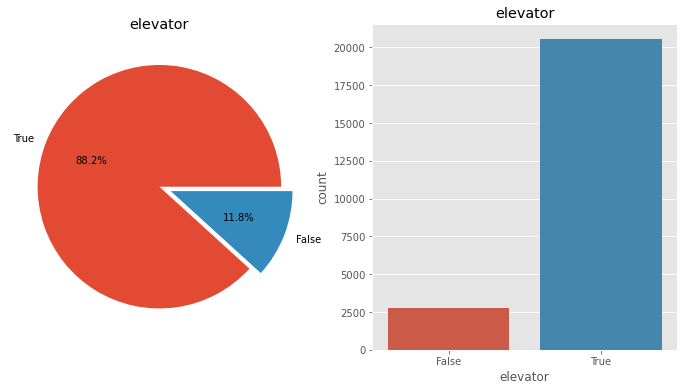

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
X_train['elevator'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('elevator')
ax[0].set_ylabel('')
sns.countplot('elevator',data=X_train,ax=ax[1])
ax[1].set_title('elevator')
plt.show()

/Users/vanjafalck/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


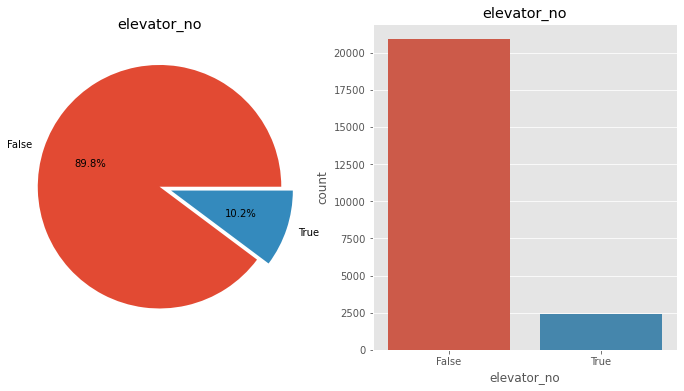

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
X_train['elevator_no'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('elevator_no')
ax[0].set_ylabel('')
sns.countplot('elevator_no',data=X_train,ax=ax[1])
ax[1].set_title('elevator_no')
plt.show()

/Users/vanjafalck/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


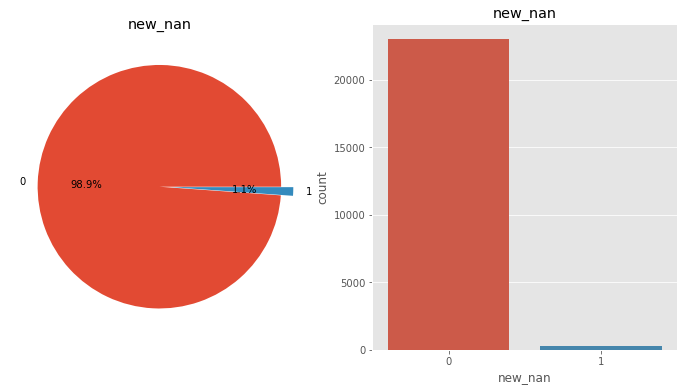

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
X_train['new_nan'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('new_nan')
ax[0].set_ylabel('')
sns.countplot('new_nan',data=X_train,ax=ax[1])
ax[1].set_title('new_nan')
plt.show()

In [15]:
X_train.groupby(['stories','elevator'])['elevator'].count()

stories  elevator
1.0      False         1
2.0      False        16
         True          2
3.0      False       248
         True         15
                    ... 
63.0     True        112
73.0     True         80
75.0     True          2
85.0     True         22
95.0     True         40
Name: elevator, Length: 97, dtype: int64

/Users/vanjafalck/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


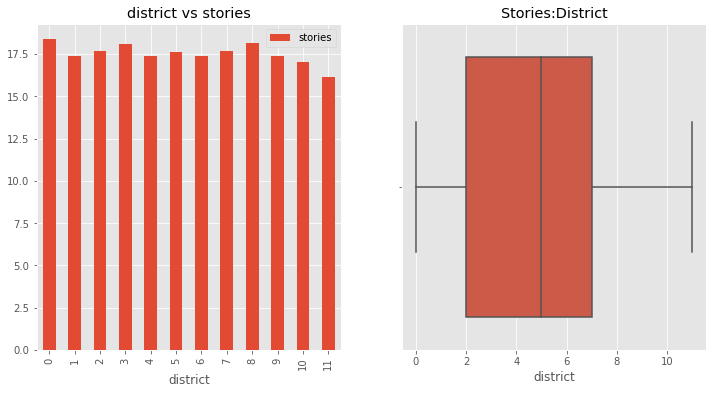

In [16]:
f,ax=plt.subplots(1, 2, figsize=(12,6))
X_train[['district','stories']].groupby(['district']).mean().plot.bar(ax=ax[0])
ax[0].set_title('district vs stories')
sns.boxplot('district', hue='stories', data=X_train, ax=ax[1])
ax[1].set_title('Stories:District')
plt.show()

In [17]:
pd.crosstab(X_train['district'], X_train['new_1.0']).T

district,0,1,2,3,4,5,6,7,8,9,10,11
new_1.0,,,,,,,,,,,,
0,1758,1488,1260,1436,1812,1455,1572,1719,1401,125,200,1285
1,668,917,724,789,680,849,875,670,806,138,124,534


In [18]:
pd.crosstab(X_test['district'], X_test['new_1.0']).T

district,0,1,2,3,4,5,6,7,8,9,10,11
new_1.0,,,,,,,,,,,,
0,787,566,720,698,755,641,844,693,679,96,70,415
1,230,259,195,296,313,363,347,421,239,71,45,194


In [19]:
X_train.groupby('district')['area_kitchen'].agg(['median', 'mean', 'count']).reset_index()

,district,median,mean,count
0,0,-0.343038,-0.028069,1918
1,1,-0.236423,0.038486,1852
2,2,-0.251654,-0.009427,1612
3,3,-0.236423,0.053925,1831
4,4,-0.373499,-0.055728,2005
5,5,-0.236423,0.031891,1852
6,6,-0.312576,0.013491,1946
7,7,-0.251654,-0.011622,1923
8,8,-0.236423,0.045815,1716
9,9,-0.023193,0.106131,222


In [20]:
X_train.groupby('rooms')['area_kitchen'].agg(['median', 'mean', 'count']).reset_index()

,rooms,median,mean,count
0,1.0,-0.434422,-0.285475,5848
1,2.0,-0.251654,-0.047359,6428
2,3.0,-0.084116,0.115636,4700
3,4.0,0.372805,0.684582,1178
4,5.0,1.134340,1.462178,282
5,6.0,1.134340,1.653255,128


In [21]:
X_train.groupby('district')['area_kitchen', 'area_total'].agg(['median', 'mean', 'count']).reset_index()

/var/folders/49/l2945tw56gg9jn_kjxk7_h440000gp/T/ipykernel_62785/733986485.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X_train.groupby('district')['area_kitchen', 'area_total'].agg(['median', 'mean', 'count']).reset_index()


district area_kitchen                 area_total                
                  median      mean count     median      mean count
0         0    -0.343038 -0.028069  1918  -0.263348 -0.034633  2426
1         1    -0.236423  0.038486  1852  -0.226703  0.066023  2405
2         2    -0.251654 -0.009427  1612  -0.278773 -0.061964  1984
3         3    -0.236423  0.053925  1831  -0.246304  0.016548  2225
4         4    -0.373499 -0.055728  2005  -0.247838 -0.009394  2492
5         5    -0.236423  0.031891  1852  -0.246304  0.005378  2304
6         6    -0.312576  0.013491  1946  -0.266757  0.013565  2447
7         7    -0.251654 -0.011622  1923  -0.244088  0.046800  2389
8         8    -0.236423  0.045815  1716  -0.240339  0.024592  2207
9         9    -0.023193  0.106131   222  -0.222272 -0.062645   263
10       10    -0.236423  0.019845   264  -0.253122 -0.090397   324
11       11    -0.388730 -0.112180  1423  -0.305106 -0.072093  1819

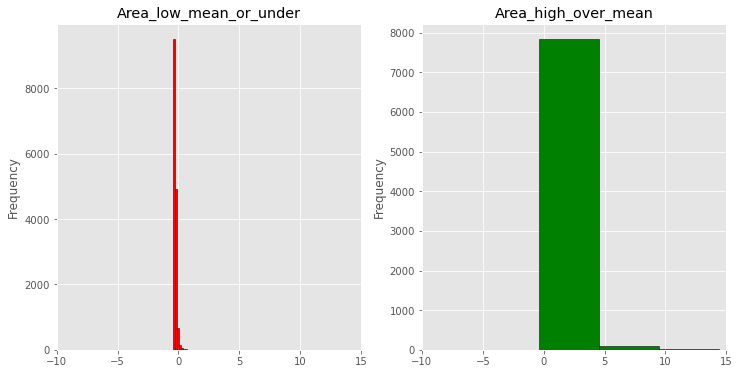

In [22]:
data = X_train.copy()
data["price"] = norm_features(data["price"])
f,ax=plt.subplots(1,2,figsize=(12,6))
data[data['area_total']<=0].price.plot.hist(ax=ax[0], color='red', bins=10, edgecolor='black')
ax[0].set_title('Area_low_mean_or_under')
ax[0].set_xlim(-10, 15)
data[data['area_total']>0].price.plot.hist(ax=ax[1], color='green', bins=10, edgecolor='black')
ax[1].set_title('Area_high_over_mean')
ax[1].set_xlim(-10, 15)
plt.show()